# SADPANDA

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF
from pandas import Series

import sqlite3

In [18]:
#load teh file
folder = 'D:\sadpanda'
file_path = r'D:\sadpanda\exhentai-07302019.sqlite'

In [19]:
# get tables from sqlite
con = sqlite3.connect(file_path)

cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('viewer_gallery_tags',), ('sqlite_sequence',), ('viewer_tag',), ('viewer_gallery',)]


In [25]:
# print table structures
for row in con.execute("pragma table_info('sqlite_master')").fetchall():
    print(row)

(0, 'type', 'text', 0, None, 0)
(1, 'name', 'text', 0, None, 0)
(2, 'tbl_name', 'text', 0, None, 0)
(3, 'rootpage', 'int', 0, None, 0)
(4, 'sql', 'text', 0, None, 0)


In [22]:
for table in cursor.fetchall():
    cursor.execute("SELECT * FROM %s LIMIT 1;" % (table))

In [28]:
cursor.execute("select * from viewer_gallery_tags limit 5;")
results = cursor.fetchall()
print(results)

[(1, 1, 1), (2, 1, 2), (3, 1, 3), (4, 1, 4), (5, 1, 5)]


In [31]:
cursor.execute("select * from viewer_gallery limit 10;")
results = cursor.fetchall()
print(results)

[(1, '598349', '4c07ed733f', 'DOA - Boy Toy Series (Foot Slavery)', '', 'Misc', 'Red Baron', '2013-06-02 06:09:28', 18, 20986112, 0, '3.60', ''), (2, '461681', '83f6c396c9', '[TWO Photograph] Akiho Yoshizawa', '', 'Asian Porn', 'Ilusmaev', '2012-02-02 03:15:11', 58, 18747909, 0, '4.34', ''), (3, '20287', '6be22de985', 'COMIC Kairakuten Beast 2006-07 Vol. 9', 'COMIC 快楽天 BEAST 2006年7月号 VOL.9', 'Manga', 'Spectre', '2008-02-09 02:38:03', 239, 97974214, 0, '4.50', ''), (4, '709432', 'd07ad92ffb', '(Reitaisai 11) [Sunset Beach (Hammer)] Loli-to Gensou (Touhou Project)', '(例大祭11) [サンセットビーチ (ハマー)] ロリート幻想 (東方Project)', 'Doujinshi', 'kouya913', '2014-06-14 13:01:22', 26, 38844758, 0, '4.62', ''), (5, '557325', '813ddbfbd4', '[@factory (Suzuka)] Touhou Flan (Touhou Project)', '[@factory (鈴鹿)] 東方フラン (東方Project)', 'Cosplay', 'tarantella', '2013-01-12 20:37:36', 405, 124190261, 0, '4.78', ''), (6, '244623', 'aa2e732ece', '(COMIC1☆4) [STUDIO Hamachigumi (Mizuki Hitoshi)] Sanae-san to Kogasa-san (Touh

In [34]:
cursor.close()
con.close()

ProgrammingError: Cannot operate on a closed database.

In [39]:
con = sqlite3.connect(file_path)
df = pd.read_sql_query("select * from viewer_gallery limit 10;", con)
df

,id,gid,token,title,title_jpn,category,uploader,posted,filecount,filesize,expunged,rating,thumbnail_url
0,1,598349,4c07ed733f,DOA - Boy Toy Series (Foot Slavery),,Misc,Red Baron,2013-06-02 06:09:28,18,20986112,0,3.60,
1,2,461681,83f6c396c9,[TWO Photograph] Akiho Yoshizawa,,Asian Porn,Ilusmaev,2012-02-02 03:15:11,58,18747909,0,4.34,
2,3,20287,6be22de985,COMIC Kairakuten Beast 2006-07 Vol. 9,COMIC 快楽天 BEAST 2006年7月号 VOL.9,Manga,Spectre,2008-02-09 02:38:03,239,97974214,0,4.50,
3,4,709432,d07ad92ffb,(Reitaisai 11) [Sunset Beach (Hammer)] Loli-to...,(例大祭11) [サンセットビーチ (ハマー)] ロリート幻想 (東方Project),Doujinshi,kouya913,2014-06-14 13:01:22,26,38844758,0,4.62,
4,5,557325,813ddbfbd4,[@factory (Suzuka)] Touhou Flan (Touhou Project),[@factory (鈴鹿)] 東方フラン (東方Project),Cosplay,tarantella,2013-01-12 20:37:36,405,124190261,0,4.78,
5,6,244623,aa2e732ece,(COMIC1☆4) [STUDIO Hamachigumi (Mizuki Hitoshi...,(COMIC1☆4) [STUDIOはまち組 (みずきひとし)] 早苗さんと小傘さん (東方...,Doujinshi,CGrascal,2010-05-27 03:08:14,28,18194201,0,4.44,
6,7,5833,37acaff5f8,[Showa 103's Illusionary Dam]Alice Necho Carto...,,Doujinshi,Spectre,2007-10-08 15:12:20,19,2402133,0,3.63,
7,8,366222,5117a6cb59,Gifs hentai pics,,Image Sets,Tiffad,2011-05-14 14:06:22,139,161328644,0,4.39,
8,9,780264,f1ce223374,(C87) [Kansai Gyogyou Kyoudou Kumiai (Marushin...,(C87) [関西漁業協同組合 (丸新)] 五十鈴詠歌 (艦隊これくしょん -艦これ-) [...,Doujinshi,NEET☆遥,2015-01-25 04:20:33,38,33541135,0,4.64,
9,10,457612,9c0310a674,[Musashimaru] Boku ga Nurse ni Natta Wake [Chi...,[ムサシマル] 僕がナースになった理由 [中国翻訳],Manga,我非loli控,2012-01-22 00:34:55,165,105831896,0,4.52,


In [44]:
con = sqlite3.connect(file_path)
df1 = pd.read_sql_query("select * from viewer_gallery_tags limit 10;", con)
df2 = pd.read_sql_query("select * from sqlite_sequence limit 10;", con)
df3 = pd.read_sql_query("select * from viewer_tag limit 10;", con)
df4 = pd.read_sql_query("select * from viewer_gallery limit 10;", con)

In [48]:
df1.columns

Index(['id', 'gallery_id', 'tag_id'], dtype='object')

In [50]:
db = sqlite3.connect(file_path)
table = pd.read_sql_query("SELECT * from viewer_gallery_tags", db)
table.to_csv(table_name + '.csv', index_label='index')

NameError: name 'table_name' is not defined

In [51]:
def to_csv(path):
    db = sqlite3.connect(path)
    cursor = db.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    for table_name in tables:
        table_name = table_name[0]
        table = pd.read_sql_query("SELECT * from %s" % table_name, db)
        table.to_csv(table_name + '.csv', index_label='index')
    cursor.close()
    db.close()
#to_csv(file_path)

In [59]:
#load dataframes
df1 = pd.read_csv('viewer_gallery.csv')
df2 = pd.read_csv('sqlite_sequence.csv')
df3 = pd.read_csv('viewer_tag.csv')
df4 = pd.read_csv('viewer_gallery_tags.csv')

In [57]:
df1.head()

,index,id,gid,token,title,title_jpn,category,uploader,posted,filecount,filesize,expunged,rating,thumbnail_url
0,0,1,598349,4c07ed733f,DOA - Boy Toy Series (Foot Slavery),NaN,Misc,Red Baron,2013-06-02 06:09:28,18,20986112,0,3.60,NaN
1,1,2,461681,83f6c396c9,[TWO Photograph] Akiho Yoshizawa,NaN,Asian Porn,Ilusmaev,2012-02-02 03:15:11,58,18747909,0,4.34,NaN
2,2,3,20287,6be22de985,COMIC Kairakuten Beast 2006-07 Vol. 9,COMIC 快楽天 BEAST 2006年7月号 VOL.9,Manga,Spectre,2008-02-09 02:38:03,239,97974214,0,4.50,NaN
3,3,4,709432,d07ad92ffb,(Reitaisai 11) [Sunset Beach (Hammer)] Loli-to...,(例大祭11) [サンセットビーチ (ハマー)] ロリート幻想 (東方Project),Doujinshi,kouya913,2014-06-14 13:01:22,26,38844758,0,4.62,NaN
4,4,5,557325,813ddbfbd4,[@factory (Suzuka)] Touhou Flan (Touhou Project),[@factory (鈴鹿)] 東方フラン (東方Project),Cosplay,tarantella,2013-01-12 20:37:36,405,124190261,0,4.78,NaN


In [64]:
df2.head()

,index,name,seq
0,0,viewer_gallery_tags,8414257
1,1,viewer_tag,130859
2,2,viewer_gallery,878432


In [60]:
df3.head()

,index,id,name,scope
0,0,1,dead_or_alive,parody
1,1,2,virtua_fighter,parody
2,2,3,christie,character
3,3,4,helena_douglas,character
4,4,5,hitomi,character


In [62]:
df4[]

,index,id,gallery_id,tag_id
0,0,1,1,1
1,1,2,1,2
2,2,3,1,3
3,3,4,1,4
4,4,5,1,5
...,...,...,...,...
8414252,8414252,8414253,878432,2929
8414253,8414253,8414254,878432,115
8414254,8414254,8414255,878432,883
8414255,8414255,8414256,878432,117


## PANDAS ANALYZE

In [67]:
# sort galleries by gid
print(df1.columns)
df1.head(5)

Index(['index', 'id', 'gid', 'token', 'title', 'title_jpn', 'category',
       'uploader', 'posted', 'filecount', 'filesize', 'expunged', 'rating',
       'thumbnail_url'],
      dtype='object')


,index,id,gid,token,title,title_jpn,category,uploader,posted,filecount,filesize,expunged,rating,thumbnail_url
0,0,1,598349,4c07ed733f,DOA - Boy Toy Series (Foot Slavery),NaN,Misc,Red Baron,2013-06-02 06:09:28,18,20986112,0,3.60,NaN
1,1,2,461681,83f6c396c9,[TWO Photograph] Akiho Yoshizawa,NaN,Asian Porn,Ilusmaev,2012-02-02 03:15:11,58,18747909,0,4.34,NaN
2,2,3,20287,6be22de985,COMIC Kairakuten Beast 2006-07 Vol. 9,COMIC 快楽天 BEAST 2006年7月号 VOL.9,Manga,Spectre,2008-02-09 02:38:03,239,97974214,0,4.50,NaN
3,3,4,709432,d07ad92ffb,(Reitaisai 11) [Sunset Beach (Hammer)] Loli-to...,(例大祭11) [サンセットビーチ (ハマー)] ロリート幻想 (東方Project),Doujinshi,kouya913,2014-06-14 13:01:22,26,38844758,0,4.62,NaN
4,4,5,557325,813ddbfbd4,[@factory (Suzuka)] Touhou Flan (Touhou Project),[@factory (鈴鹿)] 東方フラン (東方Project),Cosplay,tarantella,2013-01-12 20:37:36,405,124190261,0,4.78,NaN


In [71]:
#sort galleries by column 'gid', in effect sorting by time uploaded
df1.sort_values(by=['gid'])

,index,id,gid,token,title,title_jpn,category,uploader,posted,filecount,filesize,expunged,rating,thumbnail_url
371584,371584,371585,9,e56264c60c,(C71) [Arisan-Antenna (Koari)] Eat The Rich! (...,(C71) [ありさんアンテナ (小蟻)] Eat The Rich! (スカッとゴルフ パンヤ),Doujinshi,Sakura,2007-03-20 01:41:12,14,4375953,0,4.49,NaN
151953,151953,151954,18,24d47df87b,"(C44) [Chirigami Goya, Fusuma go Ten (Shoji Ha...","(C44) [ちり紙小屋, ふすま御殿 (障子張子)] XX (ドラゴンボールZ) [英訳]",Doujinshi,Tim222,2007-03-20 04:21:26,34,2974434,0,4.36,NaN
850590,850590,850591,31,528d4db448,[Hime Club] Love and Poor,NaN,Doujinshi,Maximillan,2007-03-21 04:09:21,47,6204800,1,3.57,https://ehgt.org/c6/05/c6057a926c5a191dd8fb33d...
154550,154550,154551,38,fa08f08c30,Phoenix's colorings,NaN,Image Sets,Phoenix,2007-03-22 11:34:11,44,7450006,0,3.88,NaN
129093,129093,129094,52,79845e5662,(C56) [Chimatsuriya Honpo (Asanagi Aoi)] Anoth...,(C56) [血祭屋本舗 (朝凪葵)] Another You (新世紀エヴァンゲリオン),Doujinshi,Darknemo2000,2007-03-24 09:23:07,83,27458005,0,4.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878429,878429,878431,1454785,911eb70ac4,Artist Cymic44 Character Gallery ::: Lisa,NaN,Misc,toonfandubya,2019-07-30 00:19:10,49,17110667,0,3.03,https://ehgt.org/f1/1d/f11dfc30bb3a62ca4b9416d...
878430,878430,878432,1454786,cbb2a481f6,[Marmalade Mum] Pokiemen - Futa League (ongoin...,NaN,Western,kikimaru024,2019-07-30 00:19:47,36,27580897,0,4.75,https://ehgt.org/95/7d/957db99ec4e70f7fb97ffaa...
878424,878424,878426,1454787,b9a6e150ee,Artist - niro,NaN,Image Set,cheezburgr,2019-07-30 00:23:02,87,161038106,0,2.17,https://ehgt.org/c1/3c/c13c3a17518458af26e366a...
878426,878426,878428,1454789,199b83fa9a,[Atelier Miyabi + Münchhausen Shoukougun (Fuji...,NaN,Non-H,k712,2019-07-30 00:25:19,20,148186796,0,4.50,https://ehgt.org/36/69/366912065cf21f4eebda9fe...


In [80]:
s1 = df1.groupby('uploader')['gid'].count().sort_values(ascending=False)

type(s1)
s1_num = s1.to_numpy()
plt.plot(s1_num)
plt.yscale('log')
plt.xscale('log')

(array([5.0877e+04, 3.0000e+01, 1.6000e+01, 2.0000e+00, 1.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.40770e+03, 2.81440e+03, 4.22110e+03, 5.62780e+03,
        7.03450e+03, 8.44120e+03, 9.84790e+03, 1.12546e+04, 1.26613e+04,
        1.40680e+04]),
 <a list of 10 Patch objects>)

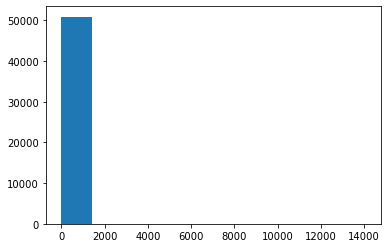

In [94]:
plt.hist(s1_num)

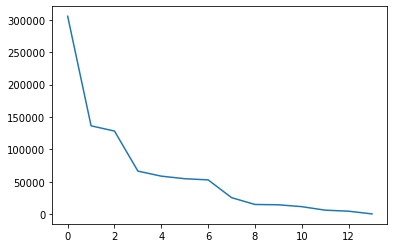

In [148]:
s2 = df1.groupby('category')['gid'].count().sort_values(ascending=False)

s2_num = s2.to_numpy()
plt.plot(s2_num)
#plt.yscale('log')
#plt.xscale('log')
def plot_log(array):
    plt.plot(array)
    plt.yscale('log')
    plt.xscale('log')

In [98]:
s2

category
Doujinshi         305703
Manga             136339
Western           128214
Image Sets         66322
Non-H              58501
Artist CG Sets     54549
Misc               52745
Game CG Sets       25281
Asian Porn         14744
Image Set          14267
Cosplay            11358
Artist CG           5927
Game CG             4343
private              138
Name: gid, dtype: int64

In [157]:
#df1.rename(columns={'id':'gallery_id'})
df3_ = df3.rename(columns={'id':'tag_id'})
df3_ = df3_.drop(['index'], axis=1)
df3_tags = df3_['scope'] +':' + df3_['name']
df3_['tag'] = df3_tags
df4_ = df4.drop(['index', 'id'], axis=1)
merged = pd.merge(df3_, df4_, on='tag_id')
merged.head()
cols = ['gallery_id', 'tag_id', 'tag', 'name', 'scope']
merged = merged[cols]
merged = merged.sort_values(by=['gallery_id'])
merged

,gallery_id,tag_id,tag,name,scope
0,1,1,parody:dead_or_alive,dead_or_alive,parody
401713,1,24,NaN,3d,NaN
144196,1,23,female:big_breasts,big_breasts,female
138074,1,22,female:slave,slave,female
135061,1,21,female:humiliation,humiliation,female
...,...,...,...,...,...
5800172,878432,1487,male:feminization,feminization,male
3403459,878432,212,female:nakadashi,nakadashi,female
8375512,878432,119843,artist:marmalade_mum,marmalade_mum,artist
6227320,878432,2929,character:misty,misty,character


In [159]:
s = merged.groupby('tag')['gallery_id'].count()

In [160]:
s = s.sort_values(ascending=False)
s = s[1:] # remove translated tag
s

tag
female:big_breasts           257517
female:lolicon               164251
language:english             156487
female:stockings             129248
female:schoolgirl_uniform    105861
                              ...  
artist:maruyama_kei               1
group:blue_spirits                1
artist:maryfgr23                  1
artist:marzena                    1
artist:.357-inch                  1
Name: gallery_id, Length: 79342, dtype: int64

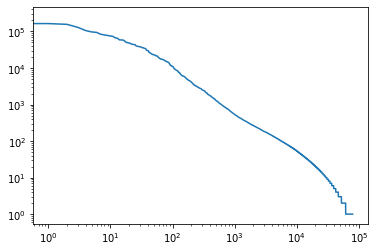

In [161]:
array = s.to_numpy()
plot_log(array)

In [153]:
#concat two columns
df3_
df3_['tag'] = df3_['scope'] +':' + df3_['name']
df3_['tag']
df3_

,tag_id,name,scope,tag
0,1,dead_or_alive,parody,parody:dead_or_alive
1,2,virtua_fighter,parody,parody:virtua_fighter
2,3,christie,character,character:christie
3,4,helena_douglas,character,character:helena_douglas
4,5,hitomi,character,character:hitomi
...,...,...,...,...
130854,130855,plebbles,NaN,NaN
130855,130856,yukimi-fuumi,group,group:yukimi-fuumi
130856,130857,kiraku,group,group:kiraku
130857,130858,spas-12,character,character:spas-12


name
english         156487
chinese          65197
korean           47315
spanish          34599
russian          17451
portuguese       10214
french            9877
speechless        8432
thai              6519
italian           4067
vietnamese        3944
rewrite           3554
german            3371
text_cleaned       935
polish             930
indonesian         468
dutch              360
hungarian          340
japanese           249
ukrainian          136
arabic             132
turkish            113
czech               82
finnish             49
tagalog             48
greek               21
swedish             16
cebuano             12
esperanto           10
latin                6
romanian             5
danish               4
catalan              4
croatian             3
norwegian            3
albanian             3
estonian             2
bengali              2
slovak               1
Name: gallery_id, dtype: int64

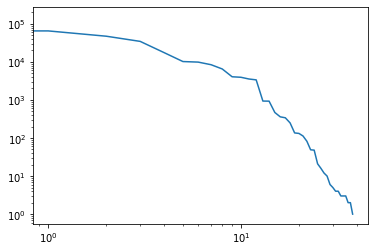

In [169]:
merged.groupby('scope')['gallery_id'].count()
lang = merged[merged['scope'] == 'language']
lang = lang[lang['name'] != 'translated']
s = lang.groupby('name')['gallery_id'].count().sort_values(ascending=False)
plot_log(s.to_numpy())
s